In [2]:
# SDA Term Project
# 60201673 박건우, 60201674 박상재, 60191556 이재훈

# Import Module
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Font for Korean
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# Data Load
data1 = 'seoulAirQuality.csv'
air = pd.read_csv(data1 , encoding = 'CP949')

air

,일시,구분,미세먼지(PM10),초미세먼지(PM25)
0,2021-12-31 23:00,평균,21.0,9.0
1,2021-12-31 23:00,강남구,21.0,9.0
2,2021-12-31 23:00,강동구,25.0,7.0
3,2021-12-31 23:00,강북구,23.0,12.0
4,2021-12-31 23:00,강서구,28.0,9.0
...,...,...,...,...
456137,2020-01-01 0:00,용산구,12.0,13.0
456138,2020-01-01 0:00,은평구,18.0,12.0
456139,2020-01-01 0:00,종로구,20.0,15.0
456140,2020-01-01 0:00,중구,22.0,18.0


In [3]:
# Data Preprocessing
import numpy as np

# Rename Columns
air.rename(columns = {"일시" : "date", "구분" : "district", "미세먼지(PM10)" : "PM10", "초미세먼지(PM25)" : "PM25"}, inplace = True)

# 'date' 열이 날짜 형식이 아니라면 변환
air['date'] = pd.to_datetime(air['date'])

# 'month'와 'day' 열이 없다면 'date' 열을 기반으로 생성
air['month'] = air['date'].apply(lambda x: x.month)
air['day'] = air['date'].apply(lambda x: x.day)

# 'month'와 'day' 열의 데이터 타입이 숫자가 아니거나 결측값이 있다면 변환 또는 처리
air[['month', 'day']] = air[['month', 'day']].apply(pd.to_numeric, errors='coerce')

# 'season' 열 생성
conditions_season = [
    (air['month'] >= 3) & (air['month'] <= 5),
    (air['month'] >= 6) & (air['month'] <= 8),
    (air['month'] >= 9) & (air['month'] <= 11),
    (air['month'] == 12) | (air['month'] == 1) | (air['month'] == 2)
]

choices_season = ['spring', 'summer', 'autumn', 'winter']

air['season'] = np.select(conditions_season, choices_season, default=np.nan)


In [9]:
from scipy import stats
from scipy.stats import shapiro, bartlett

# 계절별 데이터 분리
spring_pm10 = air[air['season'] == 'spring']['PM10']
summer_pm10 = air[air['season'] == 'summer']['PM10']
autumn_pm10 = air[air['season'] == 'autumn']['PM10']
winter_pm10 = air[air['season'] == 'winter']['PM10']

spring_pm25 = air[air['season'] == 'spring']['PM25']
summer_pm25 = air[air['season'] == 'summer']['PM25']
autumn_pm25 = air[air['season'] == 'autumn']['PM25']
winter_pm25 = air[air['season'] == 'winter']['PM25']

# PM10 값이 100 이상인 행 제거
air_filtered = air[air['PM10'] < 100]

# 계절별 PM10 데이터 분리
spring_pm10 = air_filtered[air_filtered['season'] == 'spring']['PM10'].dropna()
summer_pm10 = air_filtered[air_filtered['season'] == 'summer']['PM10'].dropna()
autumn_pm10 = air_filtered[air_filtered['season'] == 'autumn']['PM10'].dropna()
winter_pm10 = air_filtered[air_filtered['season'] == 'winter']['PM10'].dropna()

# 랜덤 샘플링을 위한 seed 설정 (재현성을 위해)
np.random.seed(0)

# 각 계절별로 PM10, PM25 데이터에서 100개씩 무작위 추출
spring_pm10_sample = spring_pm10.sample(n=100)
summer_pm10_sample = summer_pm10.sample(n=100)
autumn_pm10_sample = autumn_pm10.sample(n=100)
winter_pm10_sample = winter_pm10.sample(n=100)

spring_pm25_sample = spring_pm25.sample(n=100)
summer_pm25_sample = summer_pm25.sample(n=100)
autumn_pm25_sample = autumn_pm25.sample(n=100)
winter_pm25_sample = winter_pm25.sample(n=100)

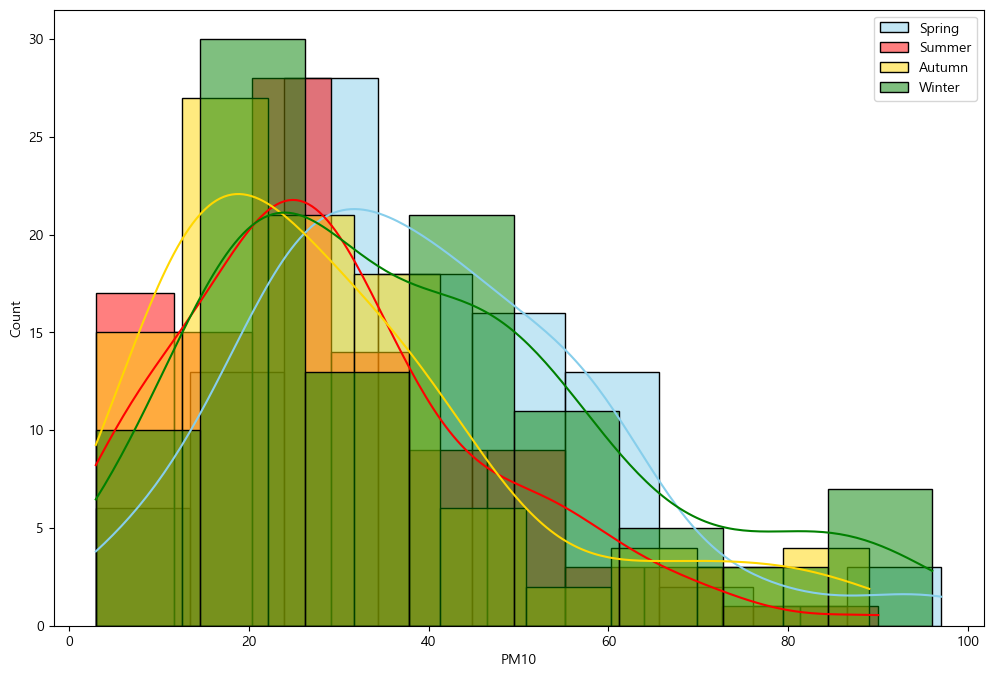

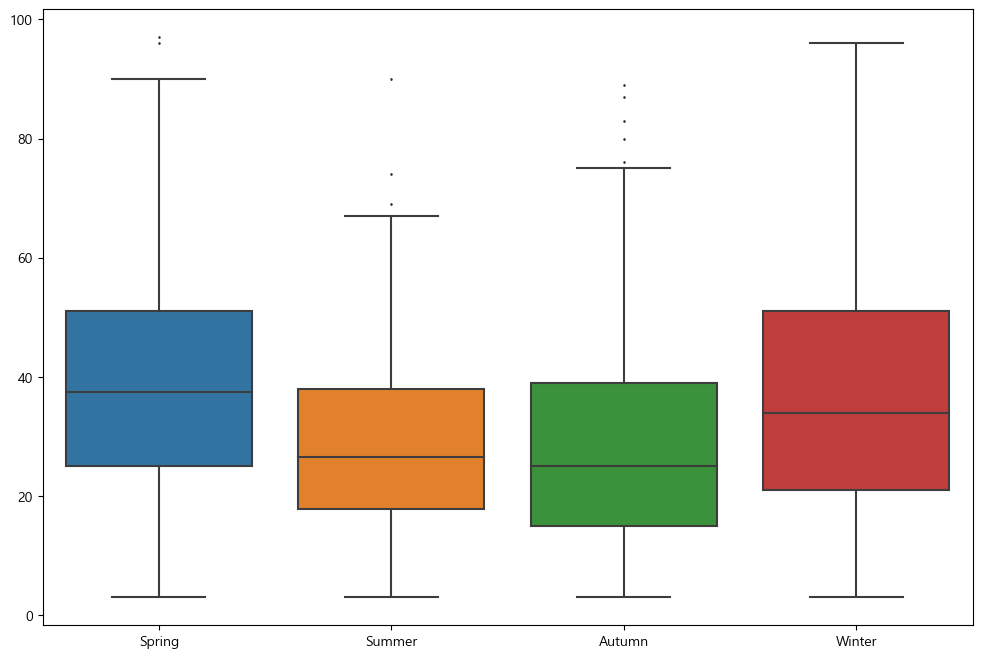

In [10]:
# 계절별 PM10 히스토그램 그리기
plt.figure(figsize=(12,8))
sns.histplot(spring_pm10_sample, color="skyblue", label="Spring", kde=True)
sns.histplot(summer_pm10_sample, color="red", label="Summer", kde=True)
sns.histplot(autumn_pm10_sample, color="gold", label="Autumn", kde=True)
sns.histplot(winter_pm10_sample, color="green", label="Winter", kde=True)
plt.legend()
plt.show()

# 계절별 PM10 박스플롯 그리기
plt.figure(figsize=(12,8))
sns.boxplot(data=[spring_pm10_sample, summer_pm10_sample, autumn_pm10_sample, winter_pm10_sample], fliersize=1)
plt.xticks([0, 1, 2, 3], ['Spring', 'Summer', 'Autumn', 'Winter'])
plt.show()


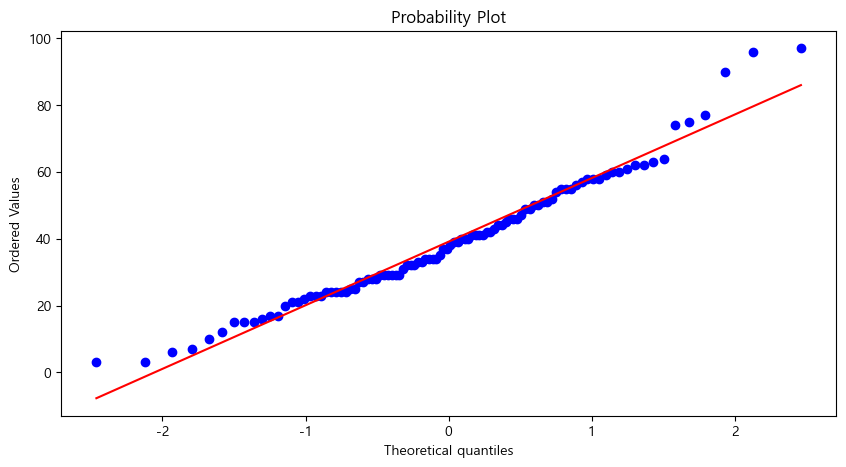

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5))
stats.probplot(spring_pm10_sample, dist=stats.norm, plot = plt)
plt.show()

In [11]:
# 정규성 검사
_, pval_spring_pm10 = stats.shapiro(spring_pm10_sample)
_, pval_summer_pm10 = stats.shapiro(summer_pm10_sample)
_, pval_autumn_pm10 = stats.shapiro(autumn_pm10_sample)
_, pval_winter_pm10 = stats.shapiro(winter_pm10_sample)
print("PM10 - Spring p-value: {}, Summer p-value: {}, Autumn p-value: {}, Winter p-value: {}".format(pval_spring_pm10, pval_summer_pm10, 
                                                                                                     pval_autumn_pm10, pval_winter_pm10))

# 등분산성 검사
_, pval_pm10 = stats.levene(spring_pm10_sample, summer_pm10_sample, autumn_pm10_sample, winter_pm10_sample)

print("PM10 - levene test p-value: {}".format(pval_pm10))


# kruskal 테스트 수행
fval_pm10, pval_pm10 = stats.kruskal(spring_pm10_sample, summer_pm10_sample, autumn_pm10_sample, winter_pm10_sample)
print(f"PM10 - F value: {fval_pm10}, p-value: {pval_pm10}")


PM10 - Spring p-value: 0.016413681209087372, Summer p-value: 0.0003560489567462355, Autumn p-value: 4.0753101870905084e-07, Winter p-value: 0.00019408491789363325
PM10 - levene test p-value: 0.051526649867137606
PM10 - F value: 25.326146481910644, p-value: 1.3196333258487624e-05


In [12]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
posthoc = pairwise_tukeyhsd(endog=air_filtered['PM10'], groups=air_filtered['season'], alpha=0.05)
print(posthoc)


 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
autumn spring  11.3548    0.0  11.1515  11.5581   True
autumn summer  -1.9602    0.0  -2.1607  -1.7597   True
autumn winter  11.1423    0.0  10.9397  11.3449   True
spring summer  -13.315    0.0 -13.5165 -13.1135   True
spring winter  -0.2125 0.0368  -0.4161   -0.009   True
summer winter  13.1025    0.0  12.9016  13.3033   True
------------------------------------------------------
